In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



os.getcwd()

'd:\\Desktop\\bysj\\bysj\\dataset'

In [7]:
train_len = len(os.listdir("./train"))
val_len = len(os.listdir("./val"))
print(f"train_len: {train_len}, val_len: {val_len}")

train_len: 37120, val_len: 6660


In [8]:
train_df = pd.DataFrame({"file_name": [i for i in os.listdir("./train")]})
train_df["class"] = train_df["file_name"].apply(lambda x: x.split("-")[1])
val_df = pd.DataFrame({"file_name": [i for i in os.listdir("./val")]})
val_df["class"] = val_df["file_name"].apply(lambda x: x.split("-")[1])

print(train_df["class"].value_counts(), "\n----------------------------------\n", val_df["class"].value_counts())

class
0      145
1      145
10     145
100    145
101    145
      ... 
95     145
96     145
97     145
98     145
99     145
Name: count, Length: 256, dtype: int64 
----------------------------------
 class
182    138
253    124
141     76
75      60
235     58
      ... 
111     12
123     12
23      12
58      12
5       12
Name: count, Length: 256, dtype: int64


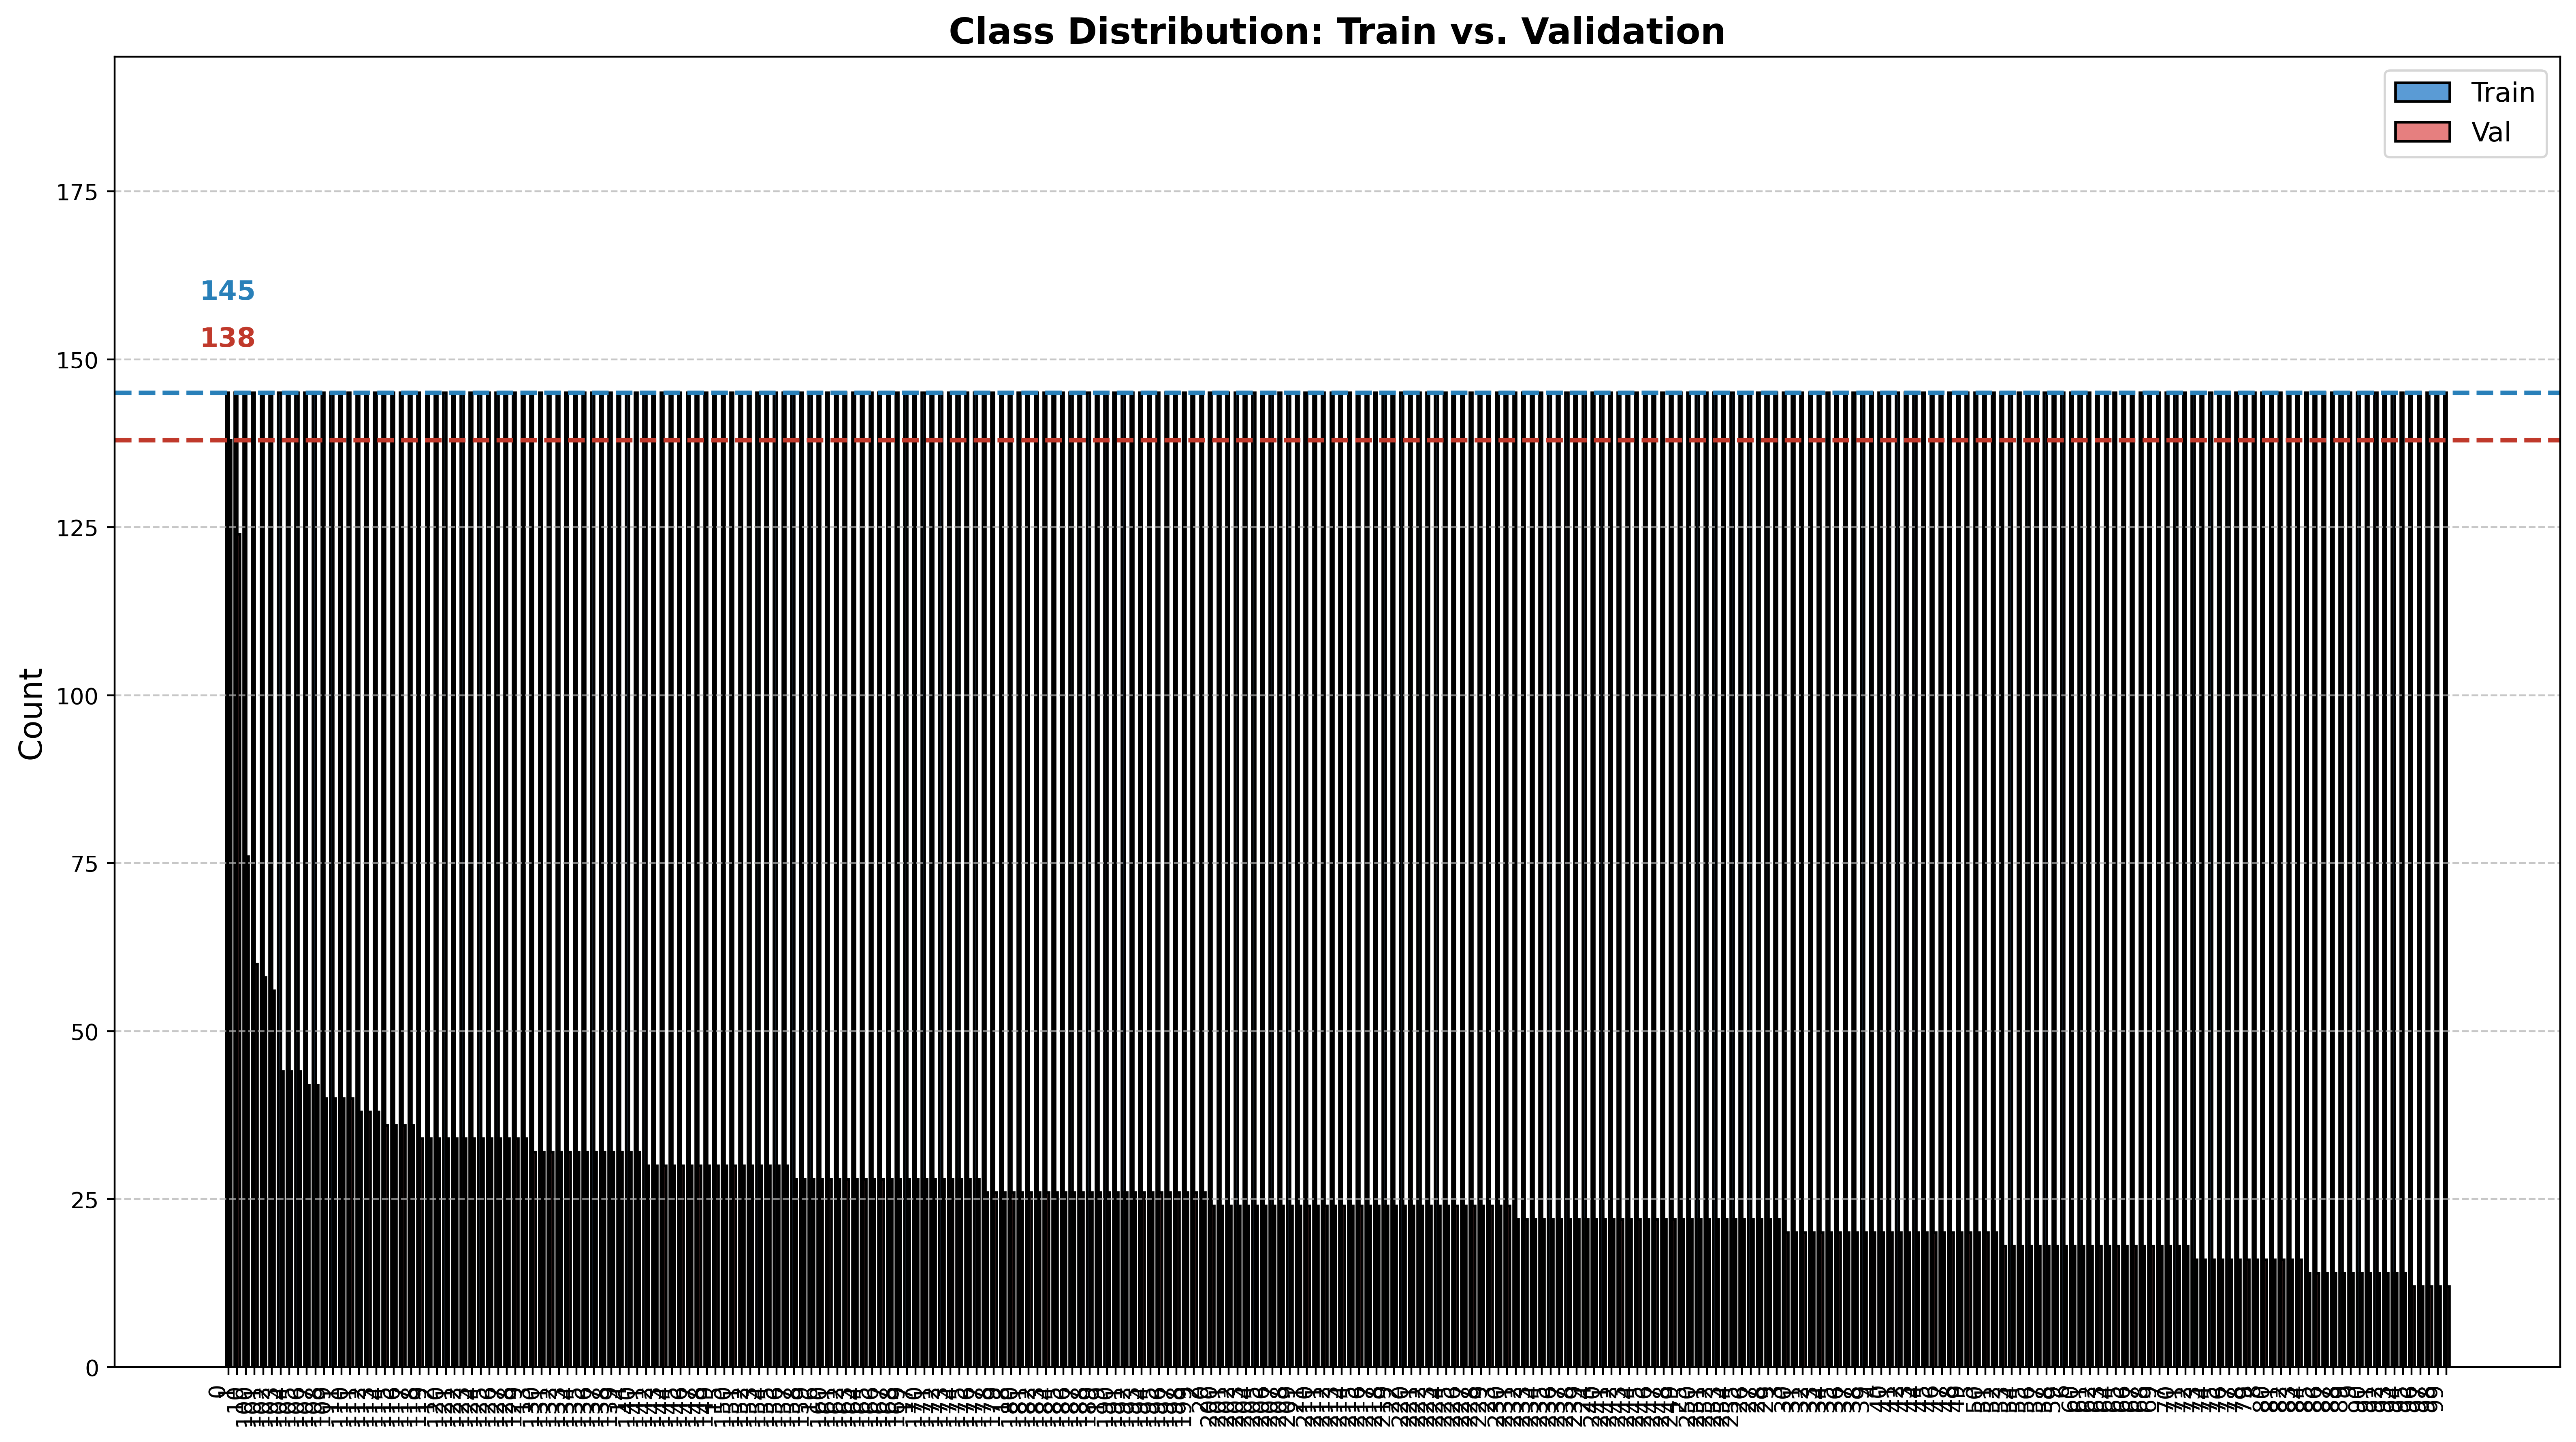

In [9]:
all_classes = train_df["class"].value_counts().index.values

x = np.linspace(0, len(all_classes) * 1.2, len(all_classes))
y1 = train_df["class"].value_counts().values
y2 = val_df["class"].value_counts().values

# 设置图表大小和分辨率
plt.figure(figsize=(16, 9), dpi=400)

# 设置条形图宽度
bar_width = 0.35

# 绘制条形图
plt.bar(x - bar_width/2, y1, width=bar_width, label="Train", color='#5A9BD5', edgecolor='black', linewidth=1.2)
plt.bar(x + bar_width/2, y2, width=bar_width, label="Val", color='#E67F7F', edgecolor='black', linewidth=1.2)

# 添加水平线，并显示其值
max_y1 = y1.max()
max_y2 = y2.max()

plt.axhline(y=max_y1, color='#2980B9', linestyle='--', linewidth=2)
plt.axhline(y=max_y2, color='#C0392B', linestyle='--', linewidth=2)

# 在水平线旁显示对应的值
plt.text(-4, max_y1+15, f'{max_y1}', color='#2980B9', va='center', ha='left', fontsize=12, fontweight='bold')
plt.text(-4, max_y2+15, f'{max_y2}', color='#C0392B', va='center', ha='left', fontsize=12, fontweight='bold')

# 设置x轴标签和旋转角度
plt.xticks(x, all_classes, rotation=90, ha='right')

# 设置y轴范围
plt.ylim(0, max(max_y1, max_y2) + 50)

# 添加标题和坐标轴标签
plt.title("Class Distribution: Train vs. Validation", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)

# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加图例
plt.legend(fontsize=12)

# 调整布局，确保不被遮挡
plt.tight_layout()

# 显示图表
plt.show()